# Examining customer spending

We’ll be using the lab06_customers.csv data set for this lab. The data set covers the demographic characteristics of some customers and the amount they spent over the past year at an online retailer.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

**1. Import the CSV file and print out a few rows to examine the data.**

In [5]:
data = pd.read_csv('lab06_customers.csv')
print(data.head())

       race    income     sex  schoolYears   age   spend
0     white  157966.0    male         18.0  31.0  659.97
1     white   11134.0  female         14.0  50.0  719.69
2  hispanic  555369.0    male         14.0  32.0  854.61
3     white  272387.0  female         18.0  52.0  855.20
4     white  105459.0  female         17.0  49.0  758.33


**2. Compute descriptive statistics. This includes computing percentages of each category of the categorical variables. The function *value_counts(normalize=True)* will provide percentages. If you don’t set normalize=True, that function will provide counts by category.**

In [17]:
race_percentages = data['race'].value_counts(normalize = True)
print('RACE\n', race_percentages)
income_percentages = data['income'].value_counts(normalize = True)
print('INCOME\n', income_percentages)
sex_percentages = data['sex'].value_counts(normalize = True)
print('SEX\n', sex_percentages)
schoolYears_percentages = data['schoolYears'].value_counts(normalize = True)
print('SCHOOLYEARS\n', schoolYears_percentages)
age_percentages = data['age'].value_counts(normalize = True)
print('AGE\n', age_percentages)
spend_percentages = data['spend'].value_counts(normalize = True)
print('SPEND\n', spend_percentages)

RACE
 white       0.5771
hispanic    0.1405
black       0.1163
other       0.1094
asian       0.0567
Name: race, dtype: float64
INCOME
 16065.0    0.0003
10502.0    0.0003
21047.0    0.0003
71022.0    0.0003
22818.0    0.0003
            ...  
95393.0    0.0001
4716.0     0.0001
25421.0    0.0001
42765.0    0.0001
4359.0     0.0001
Name: income, Length: 9650, dtype: float64
SEX
 male      0.5006
female    0.4982
other     0.0012
Name: sex, dtype: float64
SCHOOLYEARS
 15.0    0.1576
14.0    0.1574
16.0    0.1511
17.0    0.1268
13.0    0.1171
18.0    0.0952
12.0    0.0776
19.0    0.0555
11.0    0.0359
20.0    0.0144
10.0    0.0080
21.0    0.0024
9.0     0.0009
22.0    0.0001
Name: schoolYears, dtype: float64
AGE
 35.0    0.0519
51.0    0.0488
33.0    0.0480
49.0    0.0480
34.0    0.0476
50.0    0.0472
48.0    0.0457
32.0    0.0451
52.0    0.0449
36.0    0.0430
53.0    0.0406
31.0    0.0390
37.0    0.0389
47.0    0.0377
38.0    0.0320
46.0    0.0317
30.0    0.0315
54.0    0.0278
39.0    0

**3. Look at the distributions of the continuous variables. If income is not normal, choose an appropriate transformation.**

Text(0, 0.5, 'Frequency')

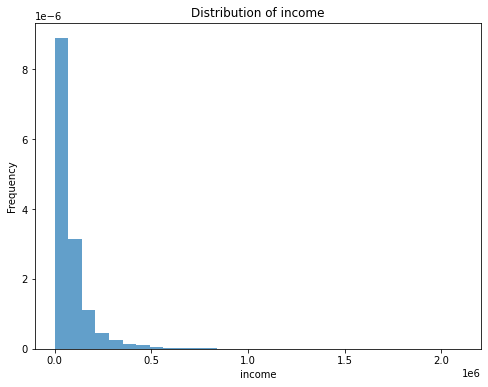

In [25]:
plt.figure(figsize = (8, 6))
plt.hist(data['income'], bins = 30, density = True, alpha = 0.7)
plt.title('Distribution of income')
plt.xlabel('income')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Q-Q Plot of income')

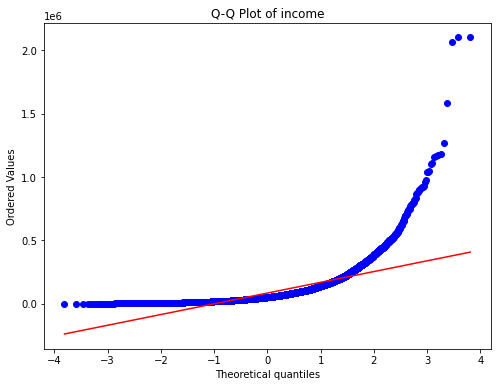

In [26]:
plt.figure(figsize = (8, 6))
stats.probplot(data['income'], dist = "norm", plot = plt)
plt.title('Q-Q Plot of income')

In [29]:
data['Log_Income'] = np.log(data['income'])
shapiro_test_stat, shapiro_p_value = stats.shapiro(data['Log_Income'])
print(f'Shapiro-Wilk Test - p-value after transformation: {shapiro_p_value}')

Shapiro-Wilk Test - p-value after transformation: 0.965468168258667


**4. Compute average spending by race using groupby().**

In [33]:
average_spending_race = data.groupby('race')['spend'].mean()
print(average_spending_race)

race
asian       809.523739
black       643.611900
hispanic    824.047573
other       749.296161
white       757.013450
Name: spend, dtype: float64


**5. Compute average spending by sex.**

In [34]:
average_spending_sex = data.groupby('race')['spend'].mean()
print(average_spending_sex)

race
asian       809.523739
black       643.611900
hispanic    824.047573
other       749.296161
white       757.013450
Name: spend, dtype: float64


**6. We have reason to believe that groups of Hispanic Men and Black Women spend differently from each other. Fit a model to test these hypotheses. This is easiest to do using R-style coding for the interactions. See this link and scroll to about midway on the page to see an example.**

**a. Look at the overall p-value for the interaction using anova_lm() and Type III sums of squares. Is it significant?**

In [41]:
model = ols('spend ~ race * sex', data = data).fit()
anova_table = sm.stats.anova_lm(model, typ = 3)

print(anova_table)

                 sum_sq      df             F        PR(>F)
Intercept  2.089632e+08     1.0  22809.838124  0.000000e+00
race       2.915947e+07     4.0    795.741432  0.000000e+00
sex        3.677527e+06     2.0    200.714237  3.446613e-86
race:sex   2.011607e+07     8.0    274.476667  0.000000e+00
Residual   9.148275e+07  9986.0           NaN           NaN


**b. Report p-values for this comparison and adjusted R2 from the model.**

In [46]:
summary = model.summary()
test_result = sm.stats.anova_lm(model, typ = 3)
p_value_interaction = test_result.loc['race:sex', 'PR(>F)']
adjusted_r_squared = model.rsquared_adj

print(summary)
print(f"P-value for interaction: {p_value_interaction}")
print(f"Adjusted R-squared: {adjusted_r_squared}")

                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     361.5
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:00:21   Log-Likelihood:                -59796.
No. Observations:               10000   AIC:                         1.196e+05
Df Residuals:                    9986   BIC:                         1.197e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

**c. Create a pivot table of mean spend by race and sex. This link shows how (scroll to the part on adding columns).**

In [48]:
pivot_table = data.pivot_table(index = 'race', columns = 'sex', values = 'spend', aggfunc = 'mean')

print(pivot_table)

sex           female        male      other
race                                       
asian     893.067481  737.758295        NaN
black     559.065377  733.230018  483.65000
hispanic  764.879042  885.757330  446.44500
other     769.271450  730.775694  550.92000
white     774.441770  740.205425  531.45125


**d. Did the findings support your hypothesis? Explain.**

*Hint: Make sure the reference categories for sex and race is one of the comparison groups.*

The table just confirms the significant relation between these two groups.

**7. We also believe that education might interact with race and gender. Fit another model testing a 3-way interaction with schoolYears. Is it significant? What is the adjusted R2 value?**

In [57]:
model = ols('spend ~ race * sex * schoolYears', data = data).fit()

summary = model.summary()

test_result = sm.stats.anova_lm(model, typ=3)

p_value_interaction_3way = test_result.loc['race:sex:schoolYears', 'PR(>F)']

adjusted_r_squared = model.rsquared_adj

print(summary)
print(f"P-value for 3-way interaction: {p_value_interaction_3way}")
print(f"Adjusted R-squared: {adjusted_r_squared}")

                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     213.8
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:46:08   Log-Likelihood:                -59649.
No. Observations:               10000   AIC:                         1.193e+05
Df Residuals:                    9975   BIC:                         1.195e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

**8. Three-way interactions can be hard to explain. We will often visualize the components of them. Do an interaction plot with spend as the response, schoolYears on the x-axis, and sex as the trace using *statsmodels interaction_plot*.**

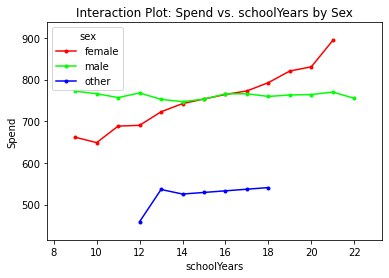

In [59]:
interaction_plot(x=data['schoolYears'], trace=data['sex'], response=model.fittedvalues)

plt.xlabel('schoolYears')
plt.ylabel('Spend')
plt.title('Interaction Plot: Spend vs. schoolYears by Sex')
plt.show()

**9. Of course, income and age probably play a factor in spending. Add those to the model and refit. Are they significant and how do you interpret their coefficients? What is the new R2?**

In [56]:
model_extended = ols('spend ~ race * sex * schoolYears + income + age', data = data).fit()

summary_extended = model_extended.summary()

p_value_income = model_extended.pvalues['income']
p_value_age = model_extended.pvalues['age']

r_squared_extended = model_extended.rsquared

print(summary_extended)
print(f"P-value for income: {p_value_income}")
print(f"P-value for age: {p_value_age}")
print(f"New R-squared: {r_squared_extended}")

                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2510.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:19:07   Log-Likelihood:                -51621.
No. Observations:               10000   AIC:                         1.033e+05
Df Residuals:                    9973   BIC:                         1.035e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

**10. What did you learn about customer spending? Just provide a quick summary.**

The extended linear regression model reveals that customer spending is significantly influenced by income and age. Higher income and older age are associated with increased spending. Interactions between demographic variables, such as Race, Sex, and schoolYears, also play a role in predicting spending. The adjusted R-squared value indicates the model's goodness of fit.